### **Classification**:

A classification problem involves predicting whether something is one thing or another.

### **Types of Classification**:

1. **Binary Classification**: Two possible classes (e.g., spam vs. not spam).

2. **Multiclass Classification**: More than two classes (e.g., cat, dog, bird).


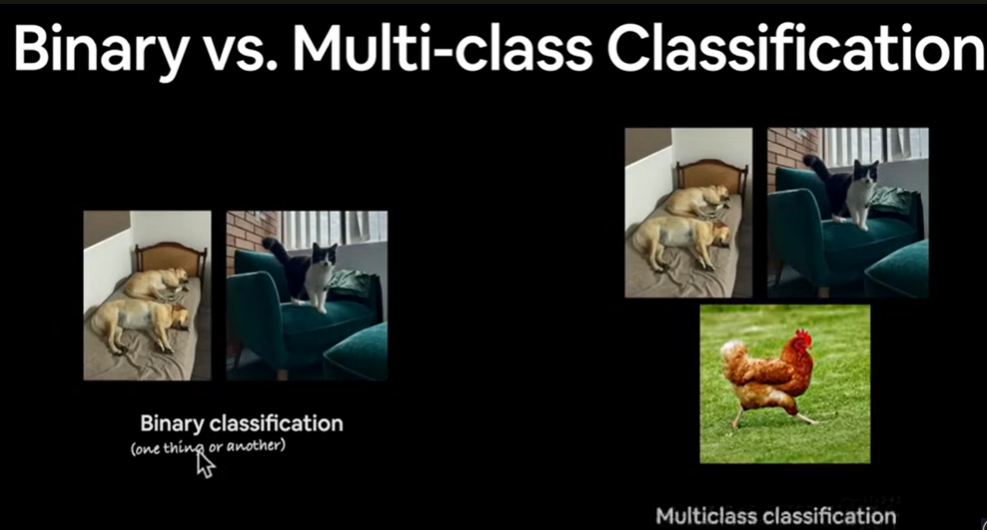

3. **Multilabel Classification**: Multiple labels can be assigned to a single instance (e.g., an image tagged as both "cat" and "outdoor").



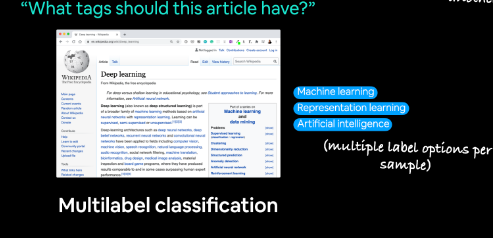

In [ ]:
Topics:
{

0. "Architecture of a classification neural network"
1. "Getting binary classification data ready"
2. "Building a PyTorch classification model"
3. "Fitting the model to data (training)"
4. "Making predictions and evaluating a model (inference)"
5. "Improving a model (from a model perspective)"
6. "Non-linearity"
7. "Replicating non-linear functions"
8. "Putting it all together with multi-class classification"
}



SyntaxError: invalid syntax (<ipython-input-1-08c41df7d581>, line 1)

### **0. Architecture of a Neural Network**:

1. **Input Layer Shap**e: Defines the size of the input data (e.g., number of features or pixels).
2. **Hidden Layers**: Layers between input and output that learn intermediate features. (e.g. 1-5)
3. **Neurons per Hidden Layer**: Number of processing units in each hidden layer.   (e.g. 32-512)
4. **Output Layer Shape**: Defines the size based on the type of output (e.g. 1 - Binary, number of classes - Multiclass).
5. **Hidden Layer Activation**: Function that adds non-linearity to the network (e.g. ReLU, Sigmoid).
6. **Output Activation**: Function applied to the output (e.g. Sigmoid for binary, Softmax for multiclass)

7. **Loss Function**: Measures the error between predicted and actual output.
(e.g. Binary cross-entropy for binary classification, categorical cross-entropy for multiclass).
8. **Optimizer**: Algorithm that updates weights to minimize the loss. (e.g. Adam, SGD)

###  **1. Making classification data ready**

In [ ]:
import sklearn

In [ ]:
from sklearn.datasets import make_circles

samples = 500

#create circles
X, Y = make_circles(samples,
                   noise=0.03,
                   random_state=42)

In [ ]:
len(X), len(Y)

(500, 500)

In [ ]:
print(f"First 10 samples of X: {X[:10]}")

First 10 samples of X: [[-0.75093268  0.2983924 ]
 [-0.20283523  0.97779788]
 [-0.7827143   0.02454953]
 [-0.69379555 -0.66860511]
 [-0.84145025  0.55789191]
 [-0.70369963 -0.37579276]
 [-0.78560088 -0.00610819]
 [-0.98464139  0.05694925]
 [-0.15785954  0.9644189 ]
 [ 0.23086247 -0.79886668]]


In [ ]:
print(f"First 10 samples of Y: {Y[:10]}")

First 10 samples of Y: [1 0 1 0 0 1 1 0 0 1]


From the values, it is cleared that the dataset is of
**Binary Classification**

X1, X2 ---> Features

Y   ---->  Labels

In [ ]:
#making Dataframe of Circle Data

import pandas as pd

circles = pd.DataFrame({"X1": X[:, 0],    # marking first sample of X as X1
                       "X2": X[:, 1],     # marking second sample of X as X2
                       "label": Y})

In [ ]:
circles.head(10)

,X1,X2,label
0,-0.750933,0.298392,1
1,-0.202835,0.977798,0
2,-0.782714,0.024550,1
3,-0.693796,-0.668605,0
4,-0.841450,0.557892,0
5,-0.703700,-0.375793,1
6,-0.785601,-0.006108,1
7,-0.984641,0.056949,0
8,-0.157860,0.964419,0
9,0.230862,-0.798867,1


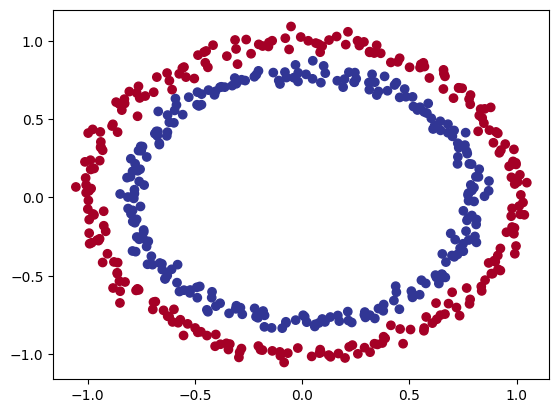

In [ ]:
#Visualing Circle

import matplotlib.pyplot as plt

plt.scatter(x=X[:, 0],
           y=X[:, 1],
           c=Y,
           cmap=plt.cm.RdYlBu);

This above dataset is often what's considered as **Toy Dataset** ( a small, simple dataset used for testing algorithms or models, for learning or experimentation purposes.) in machine learning.

e.g. Iris dataset or the MNIST dataset.

### 1.1 Checking input & output shapes

In [ ]:
X.shape

(500, 2)

In [ ]:
Y.shape

(500,)

In [ ]:
#checking the first example of features and labels

X_sample = X[0]
Y_sample = Y[0]

print(f"X_sample: {X_sample} and shape of X: {X_sample.shape}")
print(f"Y_sample: {Y_sample} and shape of Y: {X_sample.shape}")

X_sample: [-0.75093268  0.2983924 ] and shape of X: (2,)
Y_sample: 1 and shape of Y: (2,)


### 1.2 Turning data into tensors and create train/test splits

In [ ]:
import torch
torch.__version__

'2.4.1+cu121'

In [ ]:
type(X), type(Y)   #this is in Numpy Array type

(numpy.ndarray, numpy.ndarray)

In [ ]:
X.dtype

dtype('float64')

In [ ]:
# turning data into tensors

X = torch.from_numpy(X).type(torch.float)
Y = torch.from_numpy(Y).type(torch.float)

In [ ]:
X[:5], Y[:5]     # got converted into Tensors type

(tensor([[-0.7509,  0.2984],
         [-0.2028,  0.9778],
         [-0.7827,  0.0245],
         [-0.6938, -0.6686],
         [-0.8415,  0.5579]]),
 tensor([1., 0., 1., 0., 0.]))

In [ ]:
#dataype changed
X.dtype, type(X)

(torch.float32, torch.Tensor)

In [ ]:
#Splitting data into train/test set
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.2,    #20% of data will be Test, 80% will be Train
                                                    random_state = 42
                                                    )

In [ ]:
samples

500

In [ ]:
len(X_train), len(X_test), len(Y_train), len(Y_test)

(400, 100, 400, 100)

### **2. Building a model**:

In [ ]:
# Standard PyTorch imports
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

### 2.1 Constructing the model

**Steps:**

1.   Subclasses nn.Module (almost all PyTorch models are subclasses of nn.Module).
2. Create 2 nn.Linear layers in the constructor capable of handling the input and output shapes of X and y.
3. Defines a forward() method containing the forward pass computation of the model.
4. Instantiates the model class and sends it to the target device



In [ ]:
X_train.shape

torch.Size([400, 2])

In [ ]:
Y_test.shape

torch.Size([100])

In [ ]:
#step 1: construct a model that subclass nn.Module

class CircleModel0(nn.Module):
  def __init__(self):
    super().__init__()

    #step 2: create 2 nn.Linear Layers
    self.layer1 = nn.Linear(in_features=2,
                             out_features=5)
    self.layer2 = nn.Linear(in_features=5,     #in_features of a layer much be same as the out_features of previous layer(if exist)
                             out_features=1)     #or else we will get Shapemismatch error

  #step 3: Forward method to outline Forward pass
  def forward(self,x):
    return self.layer2(self.layer1(x))      # x(input) --> layer1 --> layer2  --> output

#step 4: Instantiate an instance of the model class
model_0 = CircleModel0().to(device)  #sending it to target device


The above code is a **Multi-layer Neural Network**

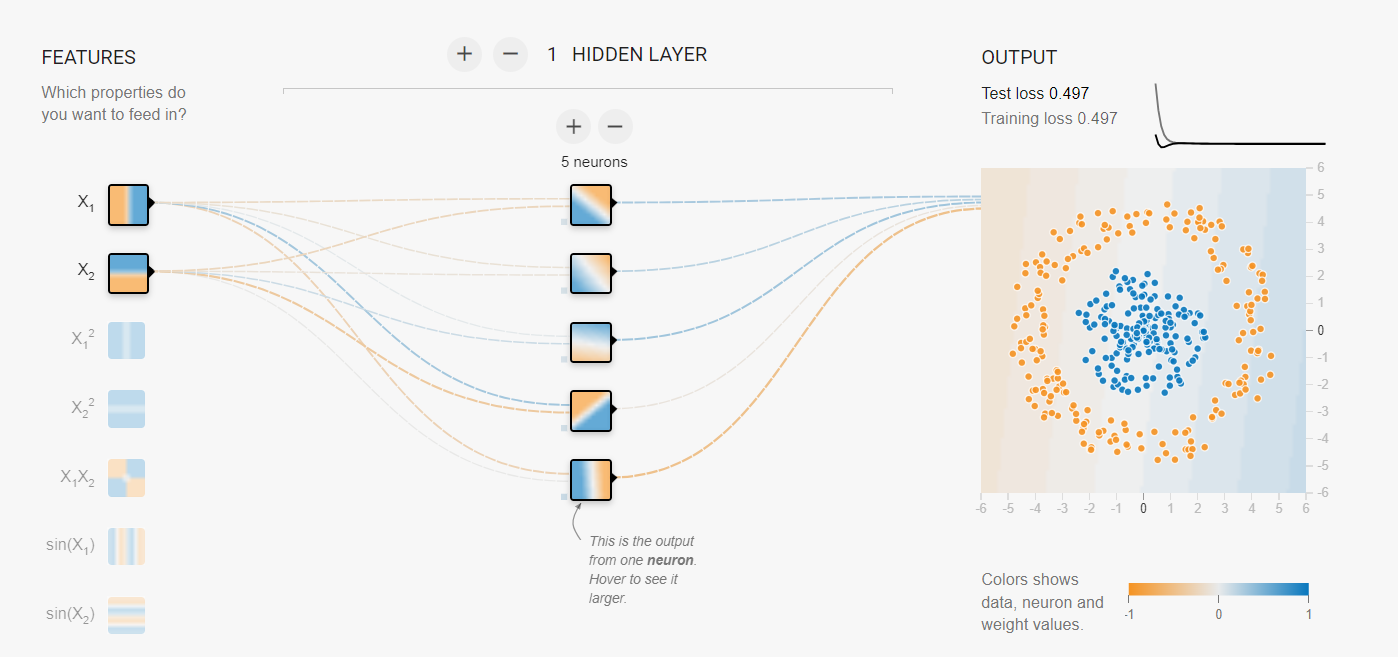

In [ ]:
model_0

CircleModel0(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('layer1.weight',
              tensor([[-0.0926,  0.2118],
                      [-0.1883,  0.5825],
                      [ 0.4067,  0.5586],
                      [ 0.3319, -0.1489],
                      [-0.6292, -0.1738]])),
             ('layer1.bias',
              tensor([ 0.4485,  0.1619, -0.1724, -0.6502,  0.0364])),
             ('layer2.weight',
              tensor([[ 0.1911, -0.1707,  0.1265, -0.2762,  0.3741]])),
             ('layer2.bias', tensor([-0.2557]))])

In [ ]:
#making predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test)

print(f"Length of the predictions: {len(untrained_preds)}")
print(f"Shape of the predictions: {untrained_preds.shape}")

Length of the predictions: 100
Shape of the predictions: torch.Size([100, 1])


In [ ]:
print(f"First 10 predictions: {untrained_preds[:10]}")

First 10 predictions: tensor([[-0.1475],
        [-0.1498],
        [-0.1594],
        [ 0.1436],
        [ 0.0654],
        [-0.2003],
        [ 0.2252],
        [-0.2563],
        [-0.2828],
        [-0.2904]])


In [ ]:
print(f"Length of the test samples: {len(X_test)}")
print(f"Shape of the test samples: {X_test.shape}")

Length of the test samples: 100
Shape of the test samples: torch.Size([100, 2])


In [ ]:
print(f"First 10 test samples: {Y_test[:10]}")

First 10 test samples: tensor([1., 1., 1., 1., 1., 1., 0., 0., 0., 0.])


### **Misc:** nn.Seqeuntial

**nn.Sequetial**:

It performs a forward pass computation of the input data through the layers in the order they appear. It simplifies building neural networks by organizing the layers in a clean, linear structure.

In [ ]:
import torch
from torch import nn

In [ ]:
#Replicating the above model using nn.Sequential

model_1 = nn.Sequential(
    nn.Linear(in_features = 2, out_features = 5),
    nn.Linear(in_features = 5, out_features = 1)
)

#it performs forward() pass and other functions in the background, but only in Sequential order

In [ ]:
model_1

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_1.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.5363, -0.6504],
                      [ 0.4477, -0.1470],
                      [ 0.6222, -0.3995],
                      [ 0.5851, -0.0088],
                      [-0.2423,  0.2782]])),
             ('0.bias', tensor([ 0.2574, -0.2578, -0.3846,  0.5080,  0.1359])),
             ('1.weight',
              tensor([[ 0.2806,  0.3843, -0.3564,  0.0516,  0.1822]])),
             ('1.bias', tensor([-0.0983]))])

### 2.2. Selecting a **Loss Function & Optimiser**

Different problem types require different loss functions

Regression  -> MAE, MSE

Classification -> BCE Loss


**Optimisers**: SGD, Adam

In [ ]:
#Setup the loss function

loss_fn = nn.BCEWithLogitsLoss()   #this has Sigmoid Activation Function built-in with it

#use optimiser
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.1)

In [ ]:
#Evaluation of model

def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

**Logits**:

Logits are the raw, unnormalized output scores from a neural network's final layer, before applying an activation function like Softmax or Sigmoid. They are often used as inputs to loss functions like cross-entropy.

In [ ]:
#testing logits

model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test)


In [ ]:
y_logits[:10]

tensor([[-0.1475],
        [-0.1498],
        [-0.1594],
        [ 0.1436],
        [ 0.0654],
        [-0.2003],
        [ 0.2252],
        [-0.2563],
        [-0.2828],
        [-0.2904]])

In [ ]:
#using sigmoid activation function on our models logits
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs[:10]

tensor([[0.4632],
        [0.4626],
        [0.4602],
        [0.5358],
        [0.5163],
        [0.4501],
        [0.5561],
        [0.4363],
        [0.4298],
        [0.4279]])

In [ ]:
torch.round(y_pred_probs[:10])

tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.]])

In [ ]:
Y_test[:10]

tensor([1., 1., 1., 1., 1., 1., 0., 0., 0., 0.])

### **3. Train the model**

Steps:

1. Forward Pass
2. Calculate the loss
3. Optimizer Zero Grad
4. Back Propogation
5. Optimiser Step (Gradient Descent)

**BCE LOSS** - expects Prediction probabilities as inputs

**BCEWithLogits Loss** - expects raw logits as inputs

**Building Training/Testing Loop**

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

In [ ]:
## Building Training Loop

In [ ]:
#set epochs
epochs = 100

#Put data to target device
X_train, Y_train = X_train.to(device), Y_train.to(device)
X_test, Y_test = X_test.to(device), Y_test.to(device)

In [ ]:
#build the loop
for epoch in range(epochs):

  ###Training
  model_0.train()

  #step 1: Forward Pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))  #converting logits -> prediction probablities -> prediction labels

  #step 2: Calculae loss, accuraccy
  train_loss = loss_fn(y_logits, Y_train)
  train_acc = accuracy_fn(y_true = Y_train, y_pred = y_pred)

  if epoch % 10 == 0:
    print(f'Train Loss: {train_loss:.5f} | Train Accuracy: {train_acc:.2f}%' )

  #step 3: Zero graident
  optimizer.zero_grad()

  #step 4: Perform backpropagation on the loss
  train_loss.backward()

  #step 5: Update the optimizer (gradient descent)
  optimizer.step()

  ###Testing

  model_0.eval()            #turns off different settings in the model that is not required during Training
  with torch.inference_mode():      # turns off gradient

    #step 1: Forward Pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    #step 2: Calculate the test loss/ acc
    test_loss = loss_fn(test_logits, Y_test)
    test_acc = accuracy_fn(y_true = Y_test, y_pred = test_pred)

    if epoch % 10 == 0:
      print(f'Epoch: {epoch} |  Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f}%' )

Train Loss: 0.69371 | Train Accuracy: 50.25%
Epoch: 0 |  Test Loss: 0.70980 | Test Accuracy: 43.00%
Train Loss: 0.69325 | Train Accuracy: 51.25%
Epoch: 10 |  Test Loss: 0.71009 | Test Accuracy: 42.00%
Train Loss: 0.69299 | Train Accuracy: 50.50%
Epoch: 20 |  Test Loss: 0.71003 | Test Accuracy: 43.00%
Train Loss: 0.69281 | Train Accuracy: 50.00%
Epoch: 30 |  Test Loss: 0.70977 | Test Accuracy: 43.00%
Train Loss: 0.69268 | Train Accuracy: 49.50%
Epoch: 40 |  Test Loss: 0.70939 | Test Accuracy: 41.00%
Train Loss: 0.69258 | Train Accuracy: 49.50%
Epoch: 50 |  Test Loss: 0.70896 | Test Accuracy: 41.00%
Train Loss: 0.69250 | Train Accuracy: 49.75%
Epoch: 60 |  Test Loss: 0.70853 | Test Accuracy: 42.00%
Train Loss: 0.69243 | Train Accuracy: 50.00%
Epoch: 70 |  Test Loss: 0.70810 | Test Accuracy: 42.00%
Train Loss: 0.69238 | Train Accuracy: 49.50%
Epoch: 80 |  Test Loss: 0.70770 | Test Accuracy: 43.00%
Train Loss: 0.69233 | Train Accuracy: 49.00%
Epoch: 90 |  Test Loss: 0.70732 | Test Accuracy

### **4. Evaluate the model:**

Make predictions and evaluate the model

In [ ]:
import requests
from pathlib import Path

# Download this helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

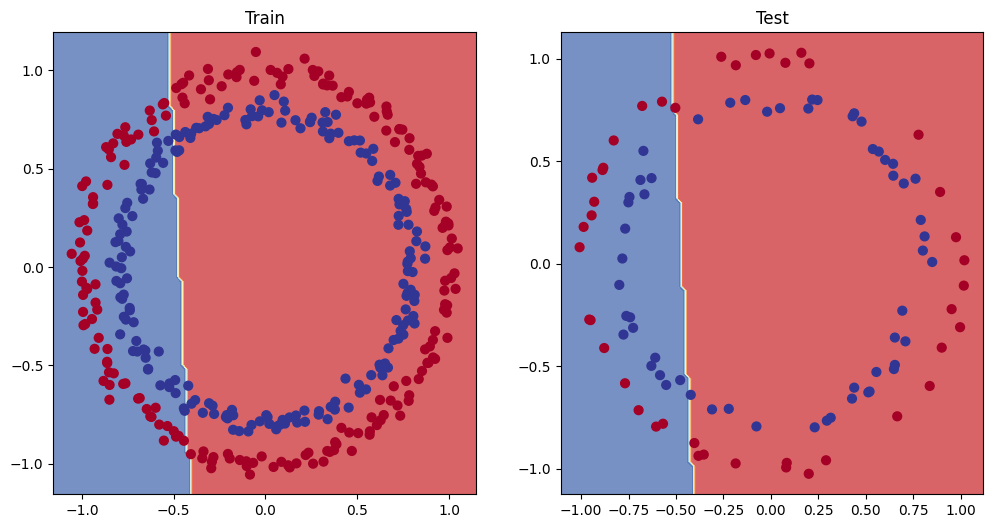

In [ ]:
#Plot decision boundary for the model

plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")   #first subplot
plot_decision_boundary(model_0, X_train, Y_train)
plt.subplot(1,2,2)
plt.title("Test")    #second subplot
plot_decision_boundary(model_0, X_test, Y_test)

### **5. Improving the model:**

How to imporve the model?

1. **Add more layers**: Increase the depth of the network to capture more complex patterns. (give the model, more time to learn)
2. **Add more hidden units**: Increase the number of neurons per layer to enhance model capacity. (potential increase the learning capabilities of the model)
3. **Fitting for longer (more epochs**): Train the model for more epochs to improve convergence. (more time to learn)
4. **Changing the activation functions**: Use different activation functions (e.g., ReLU, Tanh) to improve non-linearity.
5. **Change the learning rate**: Adjust the learning rate for better convergence speed and stability.
6. **Change the loss function**: Use a more suitable loss function based on the problem type (e.g., cross-entropy for classification).
7. **Use transfer learning**: Leverage pre-trained models to improve performance on new tasks with limited data.

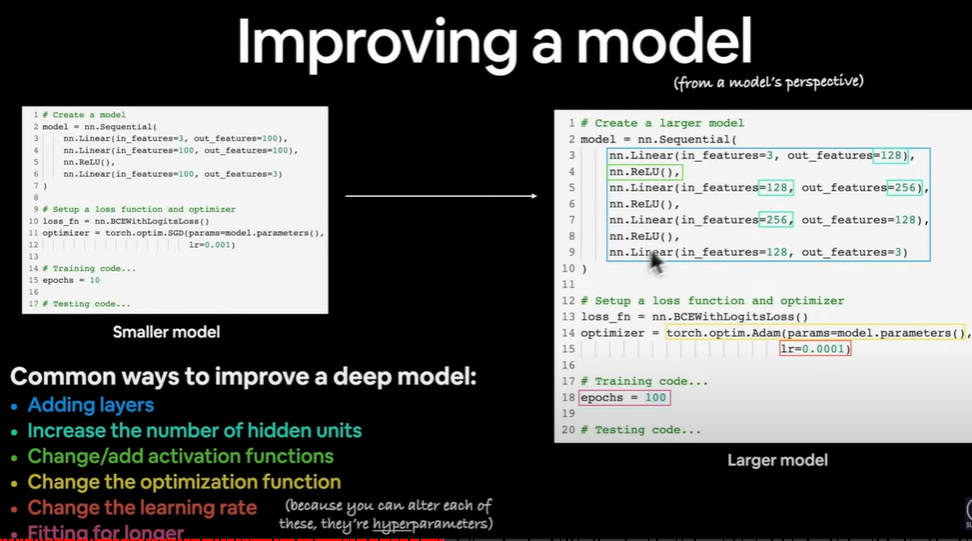

The options are based on **model's perspective**, i.e. changes based on the model, not data.

In [ ]:
#changes to be made to the previous model: Add more layers, hidden units, no. of epochs

class CircleModel1(nn.Module):
  def __init__(self):
    super().__init__()

    #more hidden units
    self.layer1 = nn.Linear(in_features=2, out_features=10)
    self.layer2 = nn.Linear(in_features=10, out_features=10)
    #more layers
    self.layer3 = nn.Linear(in_features=10, out_features=1)

  #step 3: overwrite Forward method
  def forward(self,x):
    #z = self.layer1(x)      #method 1
    #z = self.layer2(z)
    #z = self.layer3(z)
    return self.layer3(self.layer2(self.layer1(x)))  #method 2

#step 4: Instantiate an instance of the model class
model_1 = CircleModel1().to(device)  #sending it to target device


In [ ]:
model_1

CircleModel1(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
model_1.state_dict()

OrderedDict([('layer1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1310

In [ ]:
#Setup the loss function: no changes here

loss_fn = nn.BCEWithLogitsLoss()   #this has Sigmoid Activation Function built-in with it

#use optimiser
optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.1)

In [ ]:
#epochs is inc, from 100 -> 1000

torch.manual_seed(42)
torch.cuda.manual_seed(42)

#set epochs
epochs = 1000

#Put data to target device
X_train, Y_train = X_train.to(device), Y_train.to(device)
X_test, Y_test = X_test.to(device), Y_test.to(device)

In [ ]:
#build the loop
for epoch in range(epochs):

  ###Training
  model_1.train()

  #step 1: Forward Pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))  #converting logits -> prediction probablities -> prediction labels

  #step 2: Calculae loss, accuraccy
  train_loss = loss_fn(y_logits, Y_train)
  train_acc = accuracy_fn(y_true = Y_train, y_pred = y_pred)

  if epoch % 100 == 0:
    print(f'Train Loss: {train_loss:.5f} | Train Accuracy: {train_acc:.2f}%' )

  #step 3: Zero graident
  optimizer.zero_grad()

  #step 4: Perform backpropagation on the loss
  train_loss.backward()

  #step 5: Update the optimizer (gradient descent)
  optimizer.step()

  ###Testing

  model_1.eval()            #turns off different settings in the model that is not required during Training
  with torch.inference_mode():      # turns off gradient

    #step 1: Forward Pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    #step 2: Calculate the test loss/ acc
    test_loss = loss_fn(test_logits, Y_test)
    test_acc = accuracy_fn(y_true = Y_test, y_pred = test_pred)

    if epoch % 100 == 0:
      print(f'Epoch: {epoch} |  Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f}%' )

Train Loss: 0.69305 | Train Accuracy: 53.25%
Epoch: 0 |  Test Loss: 0.69706 | Test Accuracy: 41.00%
Train Loss: 0.69206 | Train Accuracy: 46.50%
Epoch: 100 |  Test Loss: 0.70303 | Test Accuracy: 37.00%
Train Loss: 0.69206 | Train Accuracy: 47.50%
Epoch: 200 |  Test Loss: 0.70307 | Test Accuracy: 36.00%
Train Loss: 0.69206 | Train Accuracy: 47.50%
Epoch: 300 |  Test Loss: 0.70308 | Test Accuracy: 36.00%
Train Loss: 0.69206 | Train Accuracy: 47.50%
Epoch: 400 |  Test Loss: 0.70309 | Test Accuracy: 36.00%
Train Loss: 0.69206 | Train Accuracy: 47.50%
Epoch: 500 |  Test Loss: 0.70309 | Test Accuracy: 36.00%
Train Loss: 0.69206 | Train Accuracy: 47.50%
Epoch: 600 |  Test Loss: 0.70309 | Test Accuracy: 36.00%
Train Loss: 0.69206 | Train Accuracy: 47.50%
Epoch: 700 |  Test Loss: 0.70309 | Test Accuracy: 36.00%
Train Loss: 0.69206 | Train Accuracy: 47.50%
Epoch: 800 |  Test Loss: 0.70309 | Test Accuracy: 36.00%
Train Loss: 0.69206 | Train Accuracy: 47.50%
Epoch: 900 |  Test Loss: 0.70309 | Test

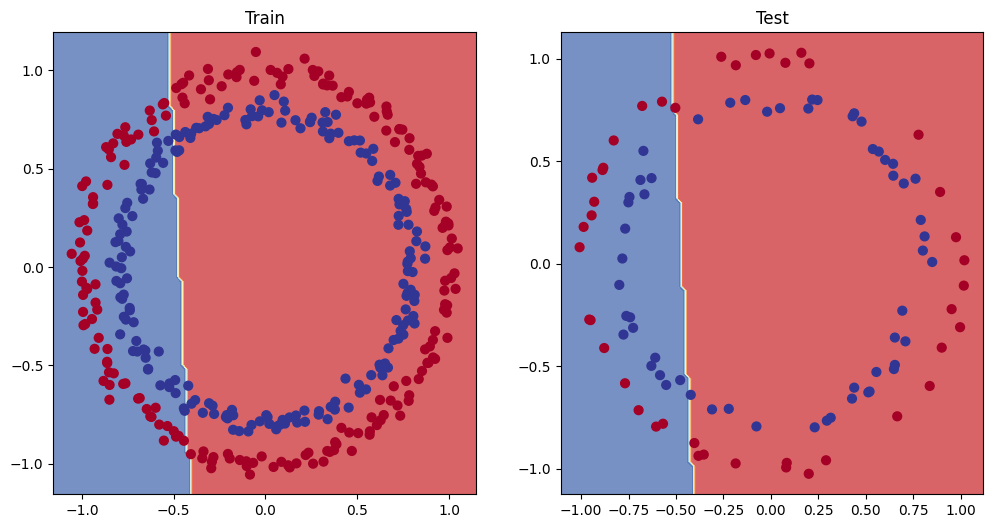

In [ ]:
#Plot decision boundary for the model

plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")   #first subplot
plot_decision_boundary(model_0, X_train, Y_train)
plt.subplot(1,2,2)
plt.title("Test")    #second subplot
plot_decision_boundary(model_0, X_test, Y_test)

from the above data, it is clear that, **Model** accuracy has imporved

### 5.1 Troubleshooting the model:

Preparing data to see if our model can model a straight line

To troubleshoot a larger model, first test out a smaller model

In [ ]:
# Create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
Y_regression = weight * X_regression + bias       # linear regression formula

# Check the data
print(len(X_regression))

100


In [ ]:
#first 5 values
X_regression[:5], Y_regression[:5]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
#Create Train/Test splits

train_split = int(0.8*len(X_regression))
X_train_reg, Y_train_reg = X_regression[:train_split], Y_regression[:train_split]
X_test_reg, Y_test_reg = X_regression[train_split:], Y_regression[train_split:]

In [ ]:
#checking the lengths
len(X_train_reg), len(Y_train_reg), len(X_test_reg), len(Y_test_reg)

(80, 80, 20, 20)

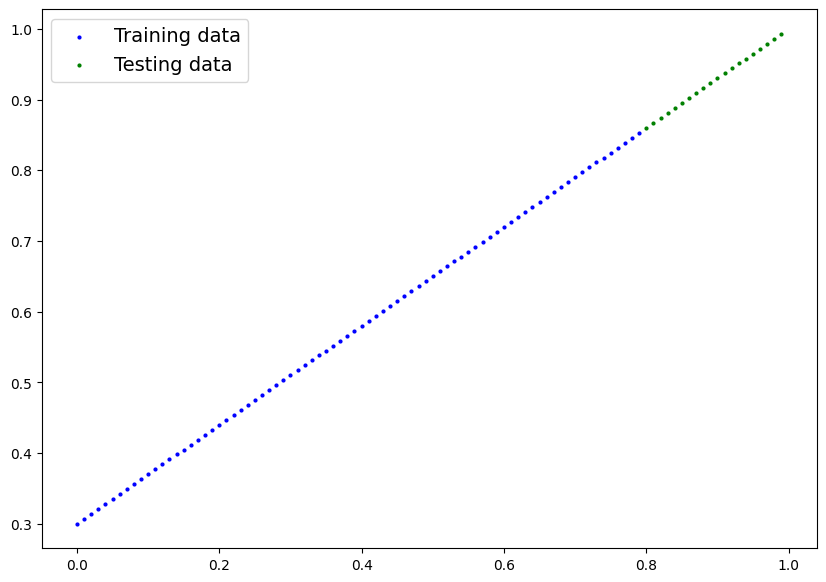

In [ ]:
plot_predictions(
      train_data=X_train_reg,
      train_labels=Y_train_reg,
      test_data=X_test_reg,
      test_labels=Y_test_reg,
);

In [ ]:
# Adjusting model1 to fit straight line

model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
)

In [ ]:
model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
#loss, optimiser

lossfn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_2.parameters(), lr = 0.001)

In [ ]:
#Train the model

torch.manual_seed(42)

#set epochs
epochs = 1000

In [ ]:
#Put data to target device (Device Agnostic Code)
X_train_reg, Y_train_reg = X_train_reg.to(device), Y_train_reg.to(device)
X_test_reg, Y_test_reg = X_test_reg.to(device), Y_test_reg.to(device)

In [ ]:
X_train_reg.shape

torch.Size([80, 1])

In [ ]:
#build the loop
for epoch in range(epochs):

  ###Training

  #step 1: Forward Pass
  y_pred = model_2(X_train_reg).squeeze()

  #step 2: Calculae loss, accuraccy
  train_loss = lossfn(y_pred, Y_train_reg)

  if epoch % 100 == 0:
    print(f'Train Loss: {train_loss:.5f}' )

  #step 3: Zero graident
  optimizer.zero_grad()

  #step 4: Perform backpropagation on the loss
  train_loss.backward()

  #step 5: Update the optimizer (gradient descent)
  optimizer.step()

  ###Testing

  model_2.eval()            #turns off different settings in the model that is not required during Training
  with torch.inference_mode():      # turns off gradient

    #step 1: Forward Pass
    test_pred = model_2(X_test_reg).squeeze()

    #step 2: Calculate the test loss/ acc
    test_loss = lossfn(test_pred, Y_test_reg)

    if epoch % 100 == 0:
      print(f'Epoch: {epoch} |  Test Loss: {test_loss:.5f}' )

Train Loss: 0.75986
Epoch: 0 |  Test Loss: 0.94965
Train Loss: 0.40300
Epoch: 100 |  Test Loss: 0.54051
Train Loss: 0.20030
Epoch: 200 |  Test Loss: 0.24887
Train Loss: 0.16775
Epoch: 300 |  Test Loss: 0.15105
Train Loss: 0.16246
Epoch: 400 |  Test Loss: 0.13289
Train Loss: 0.15976
Epoch: 500 |  Test Loss: 0.13706
Train Loss: 0.15756
Epoch: 600 |  Test Loss: 0.14673
Train Loss: 0.15564
Epoch: 700 |  Test Loss: 0.15739
Train Loss: 0.15396
Epoch: 800 |  Test Loss: 0.16779
Train Loss: 0.15248
Epoch: 900 |  Test Loss: 0.17763


In [ ]:
y_pred.shape

torch.Size([80])

In [ ]:
##Evaluation Mode

model_2.eval()            #turns off different settings in the model that is not required during Training
with torch.inference_mode():      # turns off gradient

  y_preds = model_2(X_test_reg).squeeze()

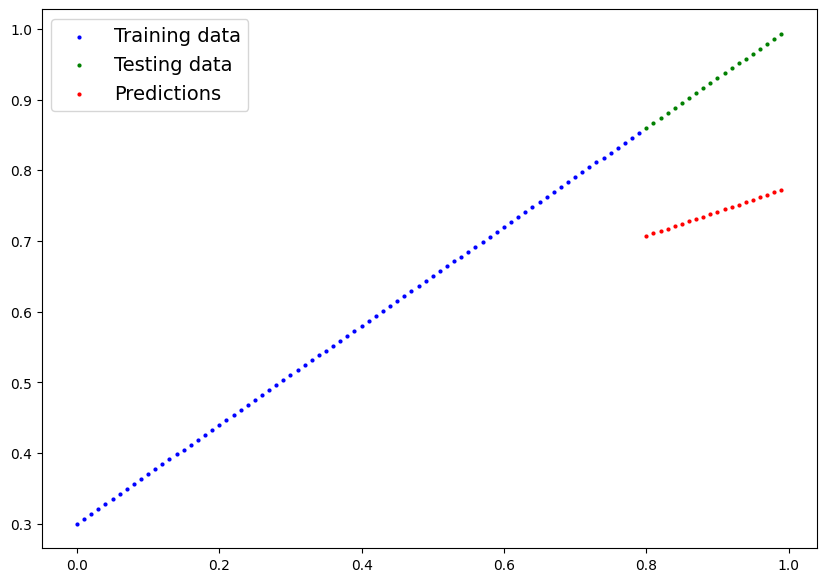

In [ ]:
#plot the predictions

plot_predictions(
      train_data=X_train_reg,
      train_labels=Y_train_reg,
      test_data=X_test_reg,
      test_labels=Y_test_reg,
      predictions= y_preds
);

### **6. Non-linearity:**

In [ ]:
###  Recreate non-linear data

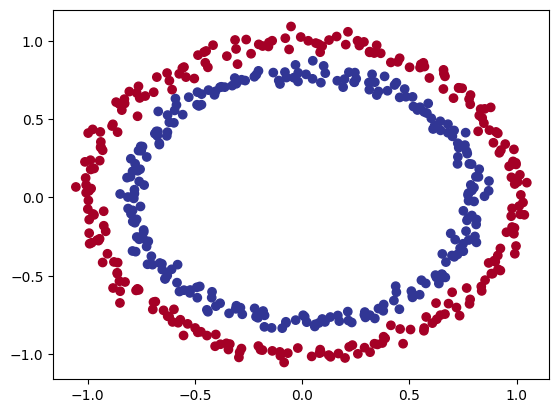

In [ ]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 500

X, y = make_circles(n_samples=500,
    noise=0.03,
    random_state=42,
)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

### 6.1 Convert the data into tensors

In [ ]:
# Convert to tensors and split into train and test sets
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
Y = torch.from_numpy(y).type(torch.float)

In [ ]:
# Split into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.2,
                                                    random_state=42
)

In [ ]:
X_train[:5], Y_train[:5]

(tensor([[-0.4995, -0.8340],
         [ 0.6212, -0.4963],
         [-0.4919, -0.5742],
         [ 0.4542,  0.8891],
         [ 0.6605,  0.7908]]),
 tensor([0., 1., 1., 0., 0.]))

### 6.2 Building a model (using non-linearity):

ANN are a **large combination of linear (straight) and non-linear (non-straight)** functions, which are potentially able to find patterns in data.

In [ ]:
###build a model using Non-linear Activation functions
from torch import nn

class circleModel2(nn.Module):
  def __init__(self):
    super().__init__()

    #layers
    self.layer1 = nn.Linear(in_features=2, out_features=10)
    self.layer2 = nn.Linear(in_features=10, out_features=10)
    self.layer3 = nn.Linear(in_features=10, out_features=1)

    #Non-linear activation function
    self.relu = nn.ReLU()

  #forward pass
  def forward(self,x):
    return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))       #the non-linear function Relu is always placed in between the layers

#instatiating the model
model_3 = circleModel2().to(device)

In [ ]:
model_3

circleModel2(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
#Setup the loss function, optimiser

loss_fn = nn.BCEWithLogitsLoss()   #this has Sigmoid Activation Function built-in with it

#use optimiser
optimizer = torch.optim.SGD(params = model_3.parameters(), lr = 0.1)

In [ ]:
model_3.state_dict()

OrderedDict([('layer1.weight',
              tensor([[ 0.2706, -0.6457],
                      [-0.4959,  0.6471],
                      [ 0.3479,  0.6790],
                      [-0.3799,  0.0821],
                      [-0.1636, -0.4214],
                      [ 0.4060, -0.2499],
                      [ 0.7000, -0.4355],
                      [-0.2613,  0.6478],
                      [ 0.1092, -0.3767],
                      [-0.1370, -0.0774]])),
             ('layer1.bias',
              tensor([ 0.4126,  0.4265,  0.4976, -0.0313, -0.2261,  0.4800, -0.0303, -0.0909,
                       0.6246,  0.0344])),
             ('layer2.weight',
              tensor([[ 0.1503,  0.1366,  0.1038, -0.1844,  0.0567,  0.2156,  0.1069,  0.1449,
                       -0.0952, -0.0727],
                      [-0.0825,  0.3112, -0.1458, -0.0973,  0.0283,  0.0798,  0.1941,  0.2519,
                       -0.1438, -0.1577],
                      [ 0.1099,  0.2850, -0.2758, -0.0039,  0.3084,  0.0884

### 6.3 Training model (non-linearity):

In [ ]:
#Random seed

torch.manual_seed(42)
torch.cuda.manual_seed(42)


In [ ]:
#Put data to target device (Device Agnostic Code)
X_train, Y_train = X_train.to(device), Y_train.to(device)
X_test, Y_test = X_test.to(device), Y_test.to(device)

In [ ]:
#Loop through data
epochs = 1000

for epoch in range(epochs):

 ###Training
  model_3.train()

  #step 1: Forward Pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))  #converting logits -> prediction probablities -> prediction labels

  #step 2: Calculae loss, accuraccy
  train_loss = loss_fn(y_logits, Y_train)
  train_acc = accuracy_fn(y_true = Y_train, y_pred = y_pred)

  if epoch % 100 == 0:
    print(f'Train Loss: {train_loss:.5f} | Train Accuracy: {train_acc:.2f}%' )

  #step 3: Zero graident
  optimizer.zero_grad()

  #step 4: Perform backpropagation on the loss
  train_loss.backward()

  #step 5: Update the optimizer (gradient descent)
  optimizer.step()

  ###Testing

  model_3.eval()            #turns off different settings in the model that is not required during Training
  with torch.inference_mode():      # turns off gradient

    #step 1: Forward Pass
    test_logits = model_3(X_test).squeeze()   #squeeze to remove one dimension
    test_pred = torch.round(torch.sigmoid(test_logits))

    #step 2: Calculate the test loss/ acc
    test_loss = loss_fn(test_logits, Y_test)
    test_acc = accuracy_fn(y_true = Y_test, y_pred = test_pred)

    if epoch % 100 == 0:
      print(f'Epoch: {epoch} |  Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f}%' )

Train Loss: 0.69285 | Train Accuracy: 51.75%
Epoch: 0 |  Test Loss: 0.70126 | Test Accuracy: 43.00%
Train Loss: 0.68960 | Train Accuracy: 51.75%
Epoch: 100 |  Test Loss: 0.69620 | Test Accuracy: 43.00%
Train Loss: 0.68629 | Train Accuracy: 51.75%
Epoch: 200 |  Test Loss: 0.69373 | Test Accuracy: 43.00%
Train Loss: 0.68187 | Train Accuracy: 52.25%
Epoch: 300 |  Test Loss: 0.69000 | Test Accuracy: 44.00%
Train Loss: 0.67569 | Train Accuracy: 59.75%
Epoch: 400 |  Test Loss: 0.68468 | Test Accuracy: 54.00%
Train Loss: 0.66682 | Train Accuracy: 61.00%
Epoch: 500 |  Test Loss: 0.67638 | Test Accuracy: 54.00%
Train Loss: 0.65315 | Train Accuracy: 68.00%
Epoch: 600 |  Test Loss: 0.66208 | Test Accuracy: 64.00%
Train Loss: 0.63093 | Train Accuracy: 76.75%
Epoch: 700 |  Test Loss: 0.63912 | Test Accuracy: 78.00%
Train Loss: 0.59311 | Train Accuracy: 86.25%
Epoch: 800 |  Test Loss: 0.59971 | Test Accuracy: 91.00%
Train Loss: 0.52696 | Train Accuracy: 91.75%
Epoch: 900 |  Test Loss: 0.53064 | Test

### **6.4: Evaluating the model**

In [ ]:
#make predictions

model_3.eval()            #turns off different settings in the model that is not required during Training
with torch.inference_mode():

  y_preds = model_3(X_test).squeeze()   #squeeze to remove one dimension

In [ ]:
y_preds[:10]

tensor([ 0.4120,  0.2997,  0.3024,  1.3429,  0.1848,  0.4964, -0.7769, -0.4627,
        -1.1535, -1.3090])

In [ ]:
Y_test[:10]

tensor([1., 1., 1., 1., 1., 1., 0., 0., 0., 0.])

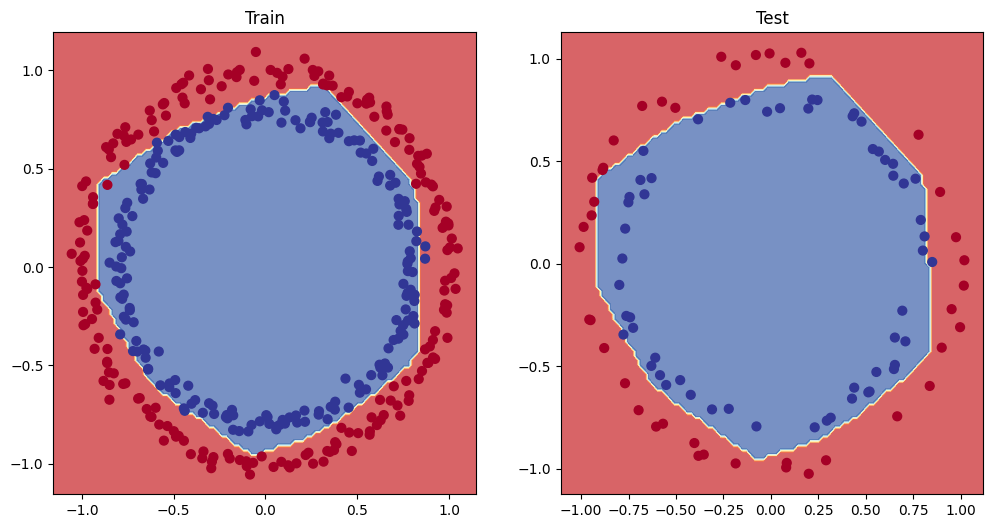

In [ ]:
#Plot decision boundaries


plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")   #first subplot
plot_decision_boundary(model_3, X_train, Y_train)
plt.subplot(1,2,2)
plt.title("Test")    #second subplot
plot_decision_boundary(model_3, X_test, Y_test)

**model_3 ** has ** non-linearity** with -

Training accuracy of **91.75%**

Testing accuracy of **93%**

###  **7. Replicating non-linear activation functions:**

In [ ]:
#create tensor

A = torch.arange(-10,10,1, dtype=torch.float32)

In [ ]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

In [ ]:
A.dtype

torch.float32

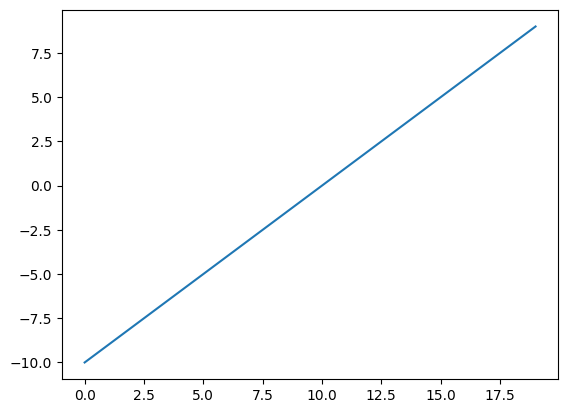

In [ ]:
#Visualise the data

plt.plot(A)

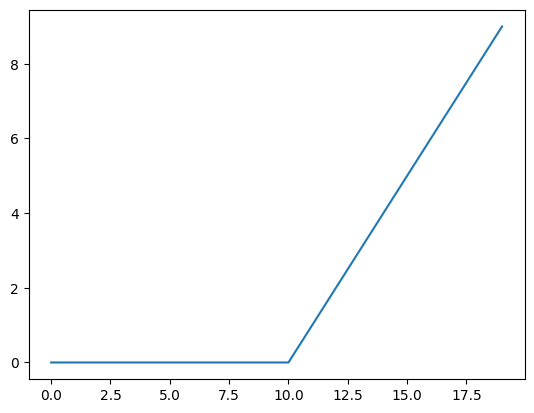

In [ ]:
plt.plot(torch.relu(A))

In [ ]:
def relu1(x):
  return torch.maximum(torch.tensor(0),x)

In [ ]:
relu1(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

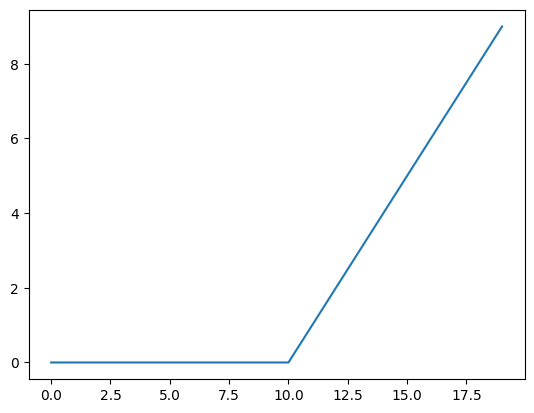

In [ ]:
#plot Relu Activation function
plt.plot(relu1(A))

In [ ]:
#Sugmoid function

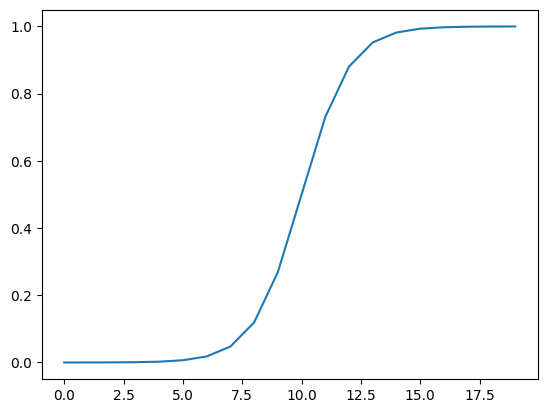

In [ ]:
plt.plot(torch.sigmoid(A))

In [ ]:
#own sigmoid function

In [ ]:
def sigmoid1(x):
  return 1/ (1+torch.exp(-x))

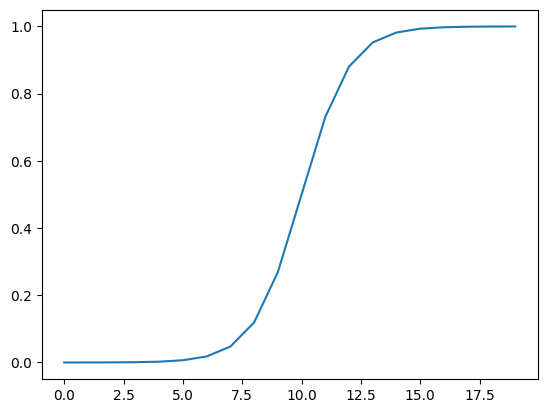

In [ ]:
plt.plot(sigmoid1(A))

### **8. Multiclass Classification:**

Using the above steps in a multiclass classsification.


Optimiser - Cross Entropy
Activation Function - SoftMax

###8.1: Creating toy-dataset

In [ ]:
#dependencies
import torch
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [ ]:
#set hyperparameters

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

In [ ]:
#create multi-class data

X_blob, Y_blob = make_blobs(
    n_samples=1000,
    n_features=NUM_FEATURES,
    centers=NUM_CLASSES,
    cluster_std=1.5,   #cluster randomness
    random_state=RANDOM_SEED
)

In [ ]:
#convert Data into Tensors

X_blob = torch.from_numpy(X_blob).type(torch.float)      #Float preferred
Y_blob = torch.from_numpy(Y_blob).type(torch.LongTensor)   #Long must be used here

In [ ]:
#split data into train/test split

X_train_blob, X_test_blob, Y_train_blob, Y_test_blob = train_test_split (
    X_blob,
    Y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

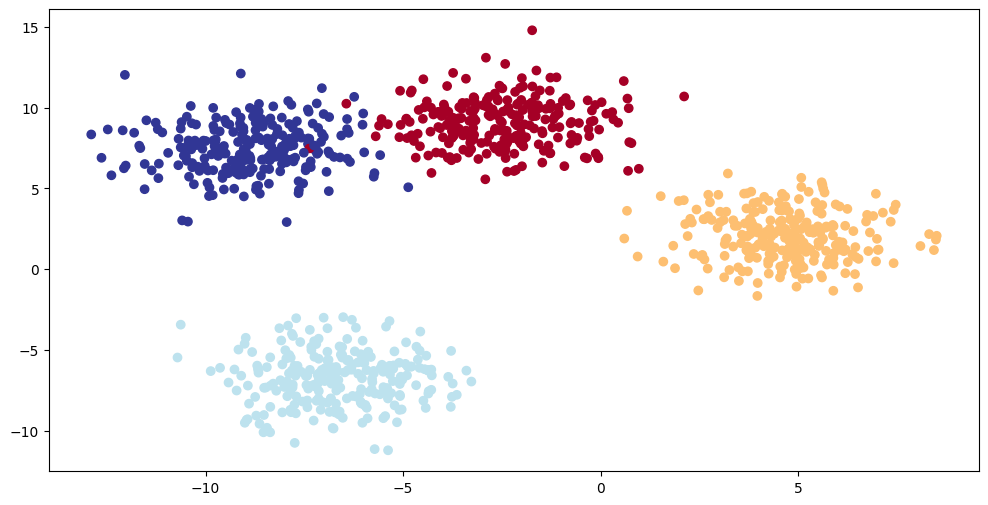

In [ ]:
#Visualise the data(plot)

plt.figure(figsize=(12,6))
plt.scatter(X_blob[:,0], X_blob[:,1], c=Y_blob, cmap=plt.cm.RdYlBu)

This is our multi-class dataset.

### 8.2: **Building the multi-class model:**

In [ ]:
#Creating device agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
#Build model

class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):   #since it is a multi-class model,
    super().__init__()

    #layers
    self.linearlayerstack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features),
    )

    #Sequential performs forward() pass and other functions in the background
    #Relu is always placed in between the layers

  #forward pass
  def forward(self, x):
    return self.linearlayerstack(x)

#Create an instance of the model
model_4 = BlobModel(input_features=2,
                      output_features=4,
                      hidden_units=8).to(device)

Here,

Input_features = number of features of x

Output_features  = number of classes in our data

In [ ]:
model_4

BlobModel(
  (linearlayerstack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

### 8.3: Create Loss Function/Optimiser


**Cross-Entropy Loss** for Multi-class Classification

In [ ]:
#create loss function
loss_fn = nn.CrossEntropyLoss()

#Create optimizer
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1)

For an **unbalanced dataset** in a multi-class classification, we have to use **weights** with CrossEntropy Loss

In [ ]:
model_4.state_dict()

OrderedDict([('linearlayerstack.0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998]])),
             ('linearlayerstack.0.bias',
              tensor([ 0.5451,  0.1045, -0.3301,  0.1802, -0.3258, -0.0829, -0.2872,  0.4691])),
             ('linearlayerstack.2.weight',
              tensor([[-0.2791, -0.1630, -0.0998, -0.2126,  0.0334, -0.3492,  0.3193, -0.3003],
                      [ 0.2730,  0.0588, -0.1148,  0.2185,  0.0551,  0.2857,  0.0387, -0.1115],
                      [ 0.0950, -0.0959,  0.1488,  0.3157,  0.2044, -0.1546,  0.2041,  0.0633],
                      [ 0.1795, -0.2155, -0.3500, -0.1366, -0.2712,  0.2901,  0.1018,  0.1464],
                      [ 0.1118, -0.0062,  0.2767, -0.

### **8.4: Getting Prediction Probablities:**

**Convert:** Logits(raw outputs) -> Prediction Probabilities(Pred Probs)-> Prediction Labels (Pred Labels)


Pred Probs: use **torch.softmax**

Pred Labels: use **argmax** of Pred Probs

In [ ]:
#making some predictions and create logits

model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_test_blob)


In [ ]:
y_logits[:10]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]])

Here, each output has 4 classes

In [ ]:
#convert Logits-> Pred Probs

y_pred_probs = torch.softmax(y_logits, dim=1)

**Softmax:**

The softmax function calculates the probability of each prediction class being the actual predicted class compared to all other possible classes.

In [ ]:
y_pred_probs[:10]

tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463],
        [0.3381, 0.1358, 0.1929, 0.3331],
        [0.2867, 0.1841, 0.2861, 0.2431],
        [0.3554, 0.1355, 0.1740, 0.3351],
        [0.3009, 0.1841, 0.2779, 0.2371],
        [0.3595, 0.1350, 0.1695, 0.3360]])

 It converts a vector of logits into probabilities, ensuring the output values sum to 1.

In [ ]:
y_pred_probs[0]

tensor([0.3169, 0.3244, 0.1405, 0.2182])

In [ ]:
#sum of logits
torch.sum(y_pred_probs[0])

tensor(1.0000)

In [ ]:
#max logits value for a particular index
torch.max(y_pred_probs[0])

tensor(0.3244)

In [ ]:
#index of max logits value for a particular index
torch.argmax(y_pred_probs[0])

tensor(1)

In [ ]:
#convert Pred Probs -> Pred Labels

y_preds = torch.argmax(y_pred_probs, dim=1)

In [ ]:
y_preds[:10]

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
Y_test_blob[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

### **8.5 Training Model (multi-class model):**

In [ ]:
#Fit the data to  multi-class model

torch.manual_seed(42)
torch.cuda.manual_seed(42)

In [ ]:
#Set Epochs
epochs = 100

#Put data to target device (Device Agnostic Code)
X_train_blob, Y_train_blob = X_train_blob.to(device), Y_train_blob.to(device)
X_test_blob, Y_test_blob = X_test_blob.to(device), Y_test_blob.to(device)

In [ ]:
Y_train_blob.dtype

torch.int64

In [ ]:
y_logits.dtype

torch.float32

In [ ]:
#Loop through data

for epoch in range(epochs):

 ###Training
  model_4.train()

  #step 1: Forward Pass
  y_logits = model_4(X_train_blob)
  y_pred = torch.softmax(y_logits,dim=1).argmax(dim=1)  #converting logits -> prediction probablities -> prediction labels

  #step 2: Calculae loss, accuraccy
  train_loss = loss_fn(y_logits, Y_train_blob)
  train_acc = accuracy_fn(y_true = Y_train_blob, y_pred = y_pred)

  if epoch % 10 == 0:
    print(f'Train Loss: {train_loss:.5f} | Train Accuracy: {train_acc:.2f}%' )

  #step 3: Zero graident
  optimizer.zero_grad()

  #step 4: Perform backpropagation on the loss
  train_loss.backward()

  #step 5: Update the optimizer (gradient descent)
  optimizer.step()

  ###Testing

  model_4.eval()            #turns off different settings in the model that is not required during Training
  with torch.inference_mode():      # turns off gradient

    #step 1: Forward Pass
    test_logits = model_4(X_test_blob)
    test_pred = torch.softmax(test_logits,dim=1).argmax(dim=1)

    #step 2: Calculate the test loss/ acc
    test_loss = loss_fn(test_logits, Y_test_blob)
    test_acc = accuracy_fn(y_true = Y_test_blob, y_pred = test_pred)

    if epoch % 10 == 0:
      print(f'Epoch: {epoch} |  Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f}%' )

Train Loss: 1.15883 | Train Accuracy: 40.38%
Epoch: 0 |  Test Loss: 1.07554 | Test Accuracy: 48.00%
Train Loss: 0.64476 | Train Accuracy: 96.75%
Epoch: 10 |  Test Loss: 0.66069 | Test Accuracy: 97.50%
Train Loss: 0.42535 | Train Accuracy: 98.50%
Epoch: 20 |  Test Loss: 0.43074 | Test Accuracy: 100.00%
Train Loss: 0.25294 | Train Accuracy: 99.12%
Epoch: 30 |  Test Loss: 0.24508 | Test Accuracy: 99.50%
Train Loss: 0.11232 | Train Accuracy: 99.25%
Epoch: 40 |  Test Loss: 0.10229 | Test Accuracy: 99.50%
Train Loss: 0.06627 | Train Accuracy: 99.25%
Epoch: 50 |  Test Loss: 0.05848 | Test Accuracy: 99.50%
Train Loss: 0.05068 | Train Accuracy: 99.25%
Epoch: 60 |  Test Loss: 0.04293 | Test Accuracy: 99.50%
Train Loss: 0.04300 | Train Accuracy: 99.25%
Epoch: 70 |  Test Loss: 0.03491 | Test Accuracy: 99.50%
Train Loss: 0.03836 | Train Accuracy: 99.25%
Epoch: 80 |  Test Loss: 0.02988 | Test Accuracy: 99.50%
Train Loss: 0.03525 | Train Accuracy: 99.25%
Epoch: 90 |  Test Loss: 0.02663 | Test Accurac

### 8.6: **Evaluating Model (multi-class model):**

In [ ]:
#make predictions, create logits

model_4.eval()            #turns off different settings in the model that is not required during Training
with torch.inference_mode():

  y_logits = model_4(X_test_blob)

In [ ]:
y_logits[:10]

tensor([[-0.6249,  5.9860, -7.6323, -8.4470],
        [-2.1738, -6.3750, -3.7202,  3.1203],
        [-3.4102, -3.8958,  3.1567, -2.6119],
        [-1.1505,  4.1962, -3.8472, -4.8820],
        [ 3.7548, -1.3391, -9.1422, -6.9466],
        [-2.8211, -7.5767, -4.2944,  3.7944],
        [-3.0306, -3.3328,  2.7955, -2.1374],
        [ 3.3761, -4.0375, -6.8987, -3.5503],
        [-4.3620, -4.9904,  3.8123, -3.3814],
        [ 3.5012, -3.0281, -7.5401, -4.7064]])

In [ ]:
#convert logits -> Pred Probs

y_pred_probs = torch.softmax(y_logits, dim=1)

In [ ]:
y_pred_probs[:10]

tensor([[1.3437e-03, 9.9865e-01, 1.2164e-06, 5.3854e-07],
        [4.9905e-03, 7.4740e-05, 1.0630e-03, 9.9387e-01],
        [1.3985e-03, 8.6060e-04, 9.9463e-01, 3.1073e-03],
        [4.7389e-03, 9.9483e-01, 3.1956e-04, 1.1353e-04],
        [9.9388e-01, 6.0966e-03, 2.4904e-06, 2.2378e-05],
        [1.3372e-03, 1.1504e-05, 3.0644e-04, 9.9834e-01],
        [2.9138e-03, 2.1537e-03, 9.8781e-01, 7.1181e-03],
        [9.9838e-01, 6.0198e-04, 3.4435e-05, 9.7989e-04],
        [2.8147e-04, 1.5016e-04, 9.9882e-01, 7.5044e-04],
        [9.9825e-01, 1.4575e-03, 1.5997e-05, 2.7210e-04]])

In [ ]:
Y_test_blob[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [ ]:
#convert Pred Probs -> Pred Labels

y_preds = torch.argmax(y_pred_probs, dim=1)

In [ ]:
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

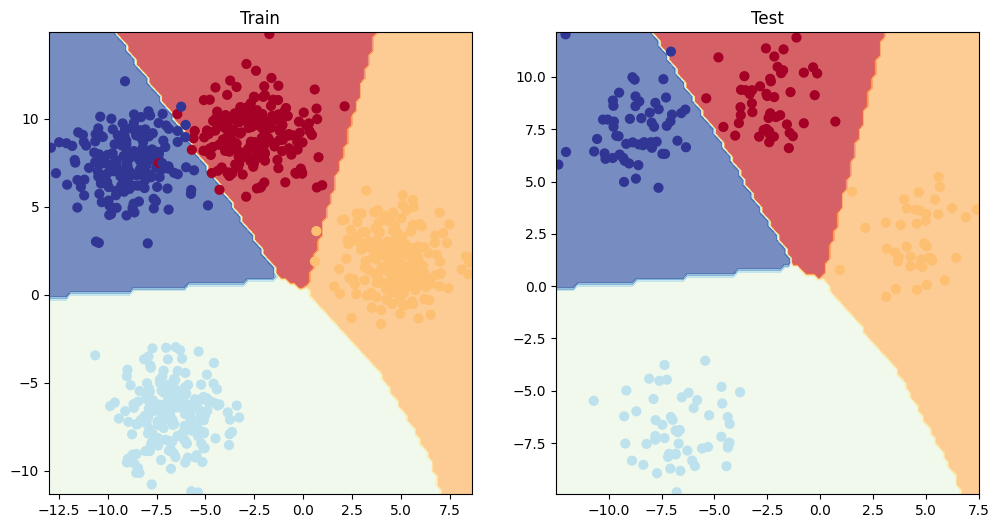

In [ ]:
#Plot decision boundaries

plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, X_train_blob, Y_train_blob)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4, X_test_blob, Y_test_blob)

**model_4** is the best model with -

Training accuracy of **99.25%**

Testing accuracy of **99.5%**

We can use the following metrics to evaluate our model --->


1. **Accuracy**: The proportion of correct predictions out of all predictions made.

2. **Precision**: The ratio of true positives to the sum of true and false positives (TP / (TP + FP)).

3. **Recall**: The ratio of true positives to the sum of true positives and false negatives (TP / (TP + FN)).

4. **F1-Score**: The harmonic mean of precision and recall, balancing both metrics.

5. **Confusion Matrix**: A table showing true positives, true negatives, false positives, and false negatives for a model's predictions.

6. **Classification Report**: A detailed summary of precision, recall, F1-score, and support for each class in a classification problem

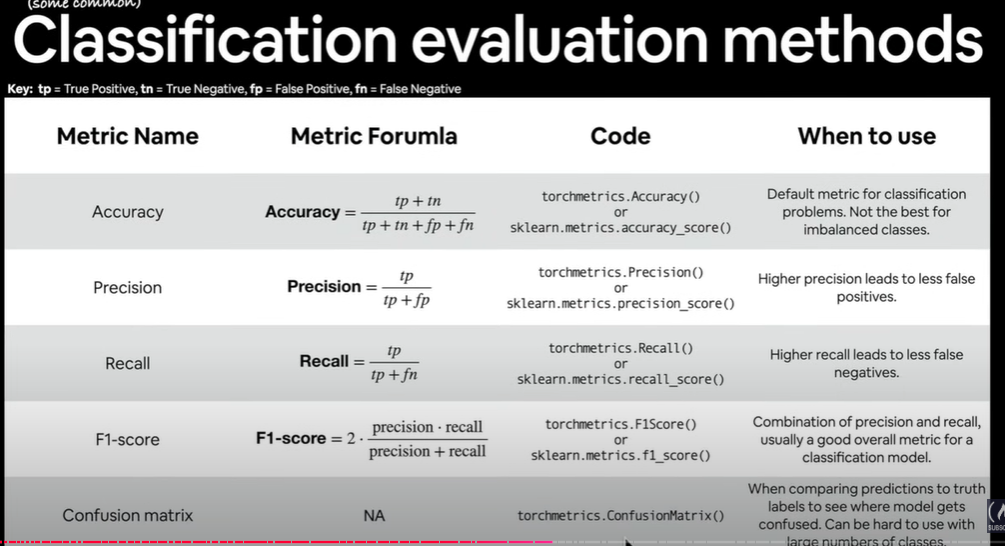